# Data Analysis of Election Results

## Practical 06 - Group E

> Michael Payne - 45133956  
> Xiaotian Liu - 44410573  
> Vincent Xu - 44937113  
> Tianhao Tang - 44030754  

### Data Obtained from:

- Australian Buraeu of Statistics
- Federal Electoral Commission
- NSW Electoral Commission


# Summary

Our project is an analysis on 5 socioeconomic factors within the australian census statistics that allows us to classify responses in an attempt to explain variance in electoral seat victories.

## Project Goals

- To build a classifier that can as accurately as possible with given variables predict a two-party outcome based on socioeconomic factors  
- To determine which factor is most important to finding the best response  
- To illustrate the differences between the different groups for each variables

#### *Our chosen factors include the following:*
Ancestry - Proportion of electorate the selected North-west European as their 1st Ancestry response  
Age - Average age of electorate  
Children - Average amount of children each electorate responded as having  
Income - Average weekly income of electorate  
Education - Proportion of electorate that has completed year 12 of High School  

### Dataset

the meat of our data comes from the Australian Bureau of Statistics, which provides access to all census data from the past 15 years. Our data comes from the most recent national census in 2016

our response data is the electoral seat winnings, which we obtained from the Federal and NSW Electoral Commissions. in our project we have used the Federal result data to train our classifiers to test on the NSW electorate statistics.

## Results

The end result of our classifiers analysis was a decision tree based classifier than, when excluding parties outside of the two-party paradigm, could correctly classify 70% of cases, a marked increase from the expected 50% from guessing
Surprisingly it seems, the best identifier for what an electorate would vote appeared to be how many families lived in the electorate, with our factor analysis returning it as 58.7% of the factor power.


# Data Cleaning and saving

For a clean final report, all data was imported and cleaned within a seperate python notebook.   
To view the cleaning notebook with working included, see Group Assignment Working notebook.ipynb
#### The notebook Initialization.ipynb, when run, will import and clean all data without working

## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pylab as plt
from matplotlib.pyplot import imread
%matplotlib inline

#-- Analysis

from sklearn.metrics import confusion_matrix, accuracy_score

#---Logistic
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

#---naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#---Knearest neighbour
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

#---Decision Tree
from sklearn.tree import DecisionTreeClassifier 

#---feature selection
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE

#---data processing
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

#---to clean up the presentation, given the same errors persist due to the dataset
import warnings
warnings.filterwarnings("ignore")

# Comparison of variables for different voters

### Our data set
our data set to show comparisons is the New South wales census responses with electorate result appended. this then allows us to split the result by elected winner

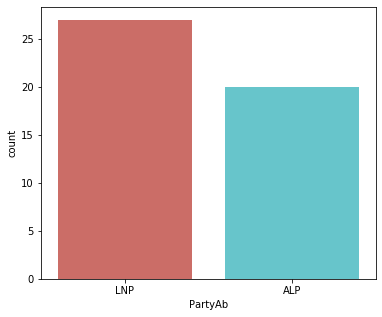

In [8]:
FullFed=pd.read_csv('Clean Data/FedFull.csv')
plt.figure(figsize=(6,5))
sns.countplot(FullFed['PartyAb'], data = FullFed, palette='hls')
plt.show()

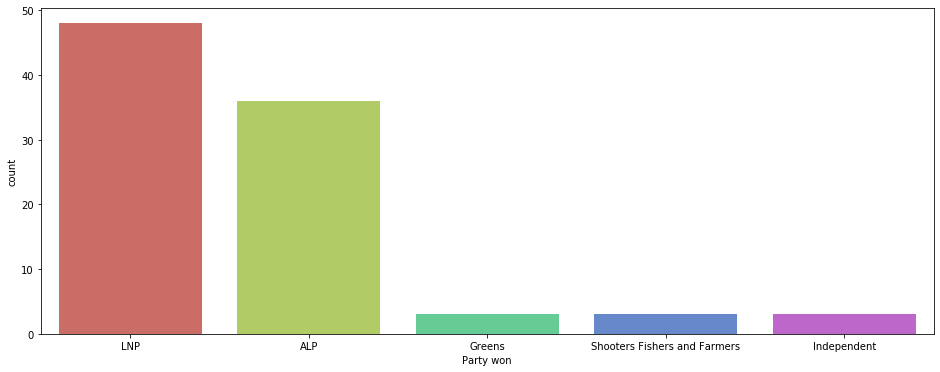

In [34]:
NSWResult=pd.read_csv('Clean Data/NSWFull.csv')
NSWResult = NSWResult.replace(to_replace ="Green", value ="Greens") 
plt.figure(figsize=(16, 6))
sns.countplot(NSWResult['Party won'], data = NSWResult, palette='hls')
plt.show()

## Proportion of electorates that have completed year 12

From this it appears that there is a similar education level among Liberal and Labor voting eletorates, with independant and greens also likely being similar, although it is unable to be certain due to small sample size.

Even though there is a small sample size, it appears that Shooters, Fishers and Farmers electorates have a visibly lower education rate that the other electorates

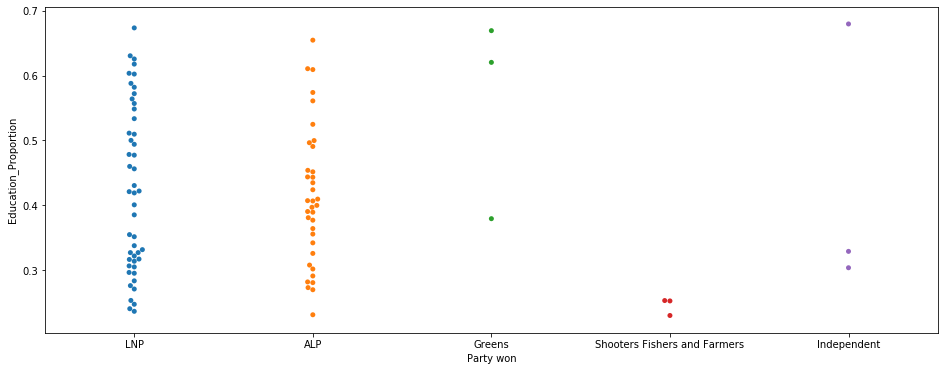

In [35]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x='Party won', y='Education_Proportion', data=NSWResult)

## Average Age of electorate

Due to the fact that the census included all people within new south wales, all electorates are likely to be very similar in age. however, it appears as though the absolute highest average age electorates vote consistently liberal after the 45 year mark

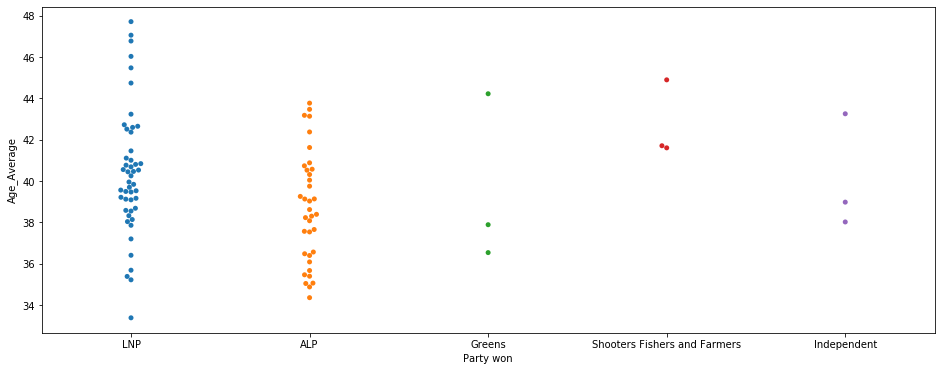

In [3]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x='Party won', y='Age_Average', data=NSWResult)

## Proportion of electorate that responded "North-west European" as first response in ancestry

While at the top of the graph, it appears as though ancestry has little effect on voting pattern, the electorates with the lowest Ancestry proportion (<0.2) appear to vote consistently for labor

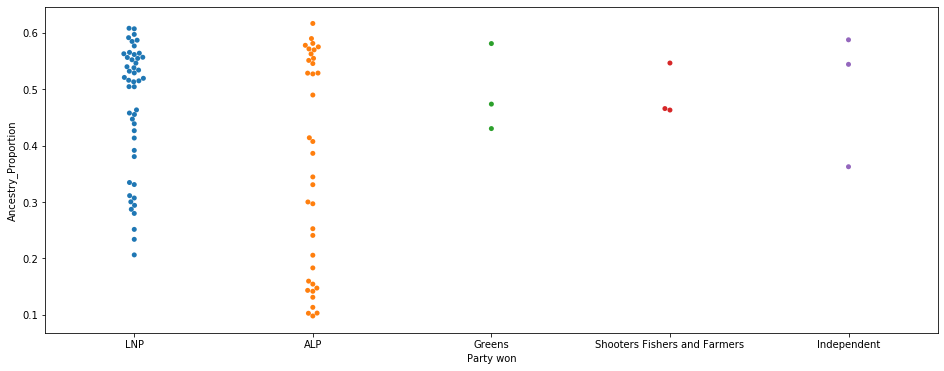

In [4]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x='Party won', y='Ancestry_Proportion', data=NSWResult)

## Average response of children in electorate

The amount of children appears to have a large effect on voting, with all Shooters, Fishers and Farmers electorates having more than 2 children, and after 2 children, there are no responses for Labor, Independant and Greens.

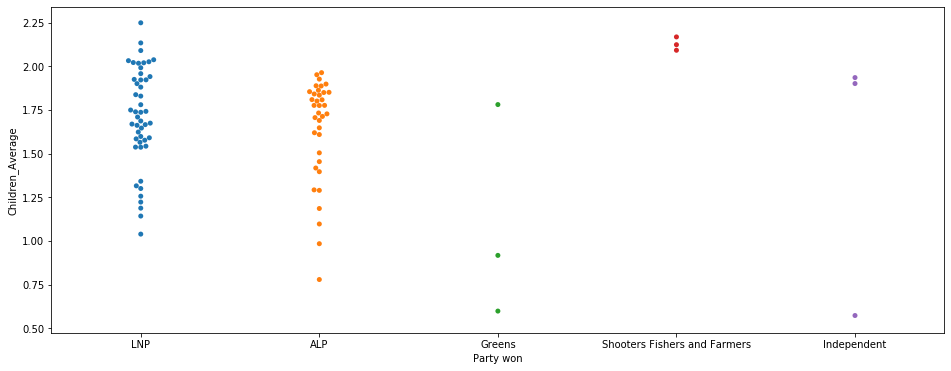

In [5]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x='Party won', y='Children_Average', data=NSWResult)

## Average Weekly income of electorate

While the middle and bottom of the swarmplot appears even for the electorates, it appears that the higher weekly incomes (>1000) vote more liberal leaning, with some votes going to greens, labor and independants.

it appears that all shooters, fishers and farmers electorates are consistently low weekly income

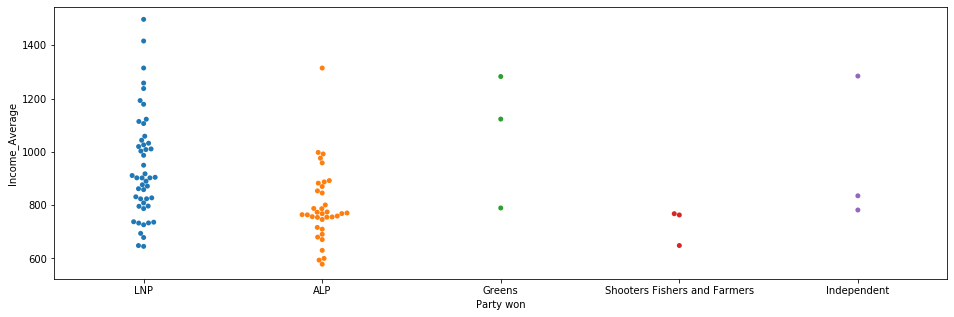

In [50]:
plt.figure(figsize=(16, 5))
sns.swarmplot(x='Party won', y='Income_Average', data=NSWResult)

## Variable Summary

Visual analysis appears to show significant difference in Weekly income, Children and Ancestry between the Labor and Liberal voting electorates. The Green and Independant voting electorates appear to show wild variance between variables, whereas Shooters fishers and farmers appear to consistently capture Low income, High children, Low education electorates

# Classification

Our classification process will include using the smaller 2 party federal election results to train our classifiers, which, while it is a smaller dataset, results in a binary response. For the purpose of this analysis parties that do not fit the two-party paradigm will be both included and removed for later results

### Logistic Regression

In [7]:
FullFed = pd.read_csv("Clean Data/FedFull.csv")
FullFed = FullFed.drop(columns='Unnamed: 0')
reg = linear_model.LogisticRegression()
X_train = FullFed.drop(['Name','PartyAb'],axis = 1)
y_train = FullFed['PartyAb']
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
test = pd.read_csv("Clean Data/NSWFull.csv")
test = test.drop(columns='Unnamed: 0')
X_test = test.drop(['Name','Party won'], axis=1)
y_test = test['Party won']

In [9]:
log_pred = reg.predict(X_test)
accuracy_score(y_test, log_pred)

0.5161290322580645

In [10]:
confusion_matrix(y_test, log_pred)

array([[ 0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  3,  0]], dtype=int64)

### Kneighbours Classifier

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.5591397849462365

### Gaussian Naive Bayes

In [12]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_pred=GNB.predict(X_test)
accuracy_score(y_test, GNB_pred)

0.40860215053763443

### Decision Tree Classifier

In [13]:
DTC=DecisionTreeClassifier(random_state=0)
DTC.fit(X_train,y_train)
DTC_pred=DTC.predict(X_test)
accuracy_score(y_test, DTC_pred)

0.6344086021505376

In [53]:
data = {'Methods':['Logistic Regression', 'Kneighbours Classifier', 'Gaussian Naive Bayes', 'Decision Tree Classifier'], 'Accuracy Score':[0.516, 0.559, 0.409, 0.634]}
df = pd.DataFrame(data)
df

,Methods,Accuracy Score
0,Logistic Regression,0.516
1,Kneighbours Classifier,0.559
2,Gaussian Naive Bayes,0.409
3,Decision Tree Classifier,0.634


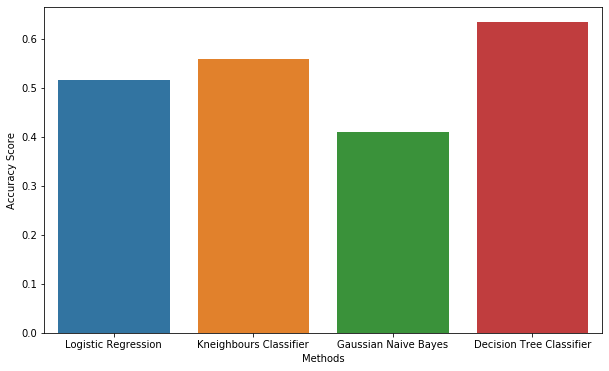

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Methods'],y=df['Accuracy Score'])

## Analysis

The reason why the decision tree classifier appears to work the best is likely due to two reasons:  
- The data set is less optimal for the other classifiers  
- The Factors for the decision tree are weighted in a way that enables the decision tree to get a better response by over-fitting

In this case the other classifiers are less optimal for the following reasons:  

- The Responses from the census do not appear to be linear  

This means that the logistic regression may perform poorly  

- There are too many variables  

The complexity of the data and rather minimal training and testing set do not allow K-Neighbours classifier to identify groups properly  

- The data set is too dependant on each other

The dependance of the variables on each other, such as education being linked to income, makes naive bayes a poor classifier

#### Decision Tree

The Decision Tree classifier works perfectly here due the importance of some factors over others, allowing it to over-fit to those factors and get a "pretty good" correct response rate.




## Removal of third party responses from test data
now we will remove the independant party responses from our test data and check the accuracy of our results

In [14]:
droptest = pd.read_csv("Clean Data/NSWFull.csv")
droptest = droptest.drop(columns='Unnamed: 0')
droptest = droptest[droptest['Party won'] != 'Green']
droptest = droptest[droptest['Party won'] != 'Greens']
droptest = droptest[droptest['Party won'] != 'Shooters Fishers and Farmers']
droptest = droptest[droptest['Party won'] != 'Independent']
dropX_test = droptest.drop(['Name','Party won'], axis=1)
dropy_test = droptest['Party won']

### Logistic Regression

In [15]:
droplog_pred = reg.predict(dropX_test)
accuracy_score(dropy_test, droplog_pred)

0.5714285714285714

### Kneighbours Classifier

In [16]:
dropknn_pred = knn.predict(dropX_test)
accuracy_score(dropy_test, dropknn_pred)

0.6190476190476191

### Gaussian Naive Bayes

In [17]:
dropGNB_pred=GNB.predict(dropX_test)
accuracy_score(dropy_test, dropGNB_pred)

0.4523809523809524

### Decision Tree Classifier

In [18]:
dropDTC_pred=DTC.predict(dropX_test)
accuracy_score(dropy_test, dropDTC_pred)

0.7023809523809523



|Improved Methods | Accuracy_score |
|--------------------|---------|
| Logistic Regression | 0.571|
| Kneighbours Classifier | 0.619 |
| Gaussian Naive Bayes | 0.452|
| Decision Tree Classifier | 0.702|

## Feature Importance
since our decision tree returned the best result, we will return feature importance on the result

In [19]:
print("Feature importances:\n{}".format(DTC.feature_importances_))

Feature importances:
[0.23625    0.02127572 0.06209559 0.58728129 0.09309739]


These features, in order, are Ancestry, Education, Age, Children and Income

it appears that we may be able to get a better performing model using only children and ancestry, lets test this now

In [20]:
FullFedsmol = pd.read_csv("Clean Data/FedFull.csv")
FullFedsmol = FullFedsmol.drop(['Unnamed: 0','Fed_EduProportion','Fed_AgeAverage','Fed_IncAverage'],axis=1)
DTCsmol=DecisionTreeClassifier(random_state=0)
smolX_train = FullFedsmol.drop(['Name','PartyAb'],axis = 1)
smoly_train = FullFedsmol['PartyAb']
DTCsmol.fit(smolX_train,smoly_train)
smoltest = pd.read_csv("Clean Data/NSWFull.csv")
smoltest = smoltest.drop(['Unnamed: 0','Education_Proportion','Age_Average','Income_Average'],axis=1)
smolX_test = smoltest.drop(['Name','Party won'], axis=1)
smoly_test = smoltest['Party won']
DTCsmol_pred=DTCsmol.predict(smolX_test)
accuracy_score(smoly_test, DTCsmol_pred)

0.6344086021505376

This is the accuracy with the third party results included, an identical result to our previous model

In [28]:
smoldroptest = pd.read_csv("Clean Data/NSWFull.csv")
smoldroptest = smoldroptest.drop(columns='Unnamed: 0')
smoldroptest = smoldroptest.drop(['Education_Proportion','Age_Average','Income_Average'],axis=1)
smoldroptest = smoldroptest[smoldroptest['Party won'] != 'Green']
smoldroptest = smoldroptest[smoldroptest['Party won'] != 'Greens']
smoldroptest = smoldroptest[smoldroptest['Party won'] != 'Shooters Fishers and Farmers']
smoldroptest = smoldroptest[smoldroptest['Party won'] != 'Independent']
smoldropX_test = smoldroptest.drop(['Name','Party won'], axis=1)
smoldropy_test = smoldroptest['Party won']

In [29]:
dropDTCsmol_pred=DTCsmol.predict(smoldropX_test)
accuracy_score(smoldropy_test, dropDTCsmol_pred)

0.7023809523809523

# Feature conclusion

while it appears that presence of children wildly affects the voting pattern, removal of the less significant factors does not produce a more accurate model, which is likely caused by the decision tree model already overfitting based on children and ancestry and the relatively small sample of test date (93 populations)

## Response Checking

Checking the counts of our prodections, we can see once again the effects of overfitting. the decision tree appears, due to its heavy use of the Children and Ancestry responses, to favour LNP resonses.

In [46]:
np.count_nonzero(dropDTC_pred == 'LNP')

73

In [47]:
np.count_nonzero(dropDTC_pred == 'ALP')

11

# Conclusion

It appears from our plots that the variables chosen can be used to predict with a greater than 70% confidence rate the electorate outcome within a two-party based election. Additionally, using only two parties as the outcomes it can draw, it can reach a nearly 64% confidence rate when indepedant and third-parties are involved. However, in our opinion, this classifier is far from perfect. It heavily biases Liberal-National coaltion responses due to its over use of the Children and Ancestry responses, and does not take into account multiple variables, like advertising, public opinion, etc.

It is however, our opinion that the 2019 Federal and NSW elections do not appear to be large upsets, at least given the census data we have analysed.

Our techniques used included:

- Classification Methods  
- Seaborn Swarm and Countplots
- Feature Analysis  
